Importing Numpy, Matplotllib, Pandas, Seaborn

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Importing CSV Files for Data Analysis

In [4]:
o = pd.read_csv("D:\(DATA) Data Analysis\E-commerce(list of orders).csv")     #loo = orders
od = pd.read_csv("D:\(DATA) Data Analysis\E-commerce(order details).csv")       #od = order details
sl = pd.read_csv("D:\(DATA) Data Analysis\E-commerce(sale target).csv")         #sl = sale target
print(o.head(5))
print(od.head(5))
print(sl.head(5))

  Order ID  Order Date CustomerName           State       City
0  B-25601  01-04-2018       Bharat         Gujarat  Ahmedabad
1  B-25602  01-04-2018        Pearl     Maharashtra       Pune
2  B-25603  03-04-2018        Jahan  Madhya Pradesh     Bhopal
3  B-25604  03-04-2018       Divsha       Rajasthan     Jaipur
4  B-25605  05-04-2018      Kasheen     West Bengal    Kolkata
  Order ID  Amount  Profit  Quantity     Category      Sub-Category
0  B-25601  1275.0 -1148.0         7    Furniture         Bookcases
1  B-25601    66.0   -12.0         5     Clothing             Stole
2  B-25601     8.0    -2.0         3     Clothing       Hankerchief
3  B-25601    80.0   -56.0         4  Electronics  Electronic Games
4  B-25602   168.0  -111.0         2  Electronics            Phones
  Month of Order Date   Category  Target
0              Apr-18  Furniture   10400
1              May-18  Furniture   10500
2              Jun-18  Furniture   10600
3              Jul-18  Furniture   10800
4        

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:2: SyntaxWarning: invalid escape sequence '\('
<>:3: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
<>:2: SyntaxWarning: invalid escape sequence '\('
<>:3: SyntaxWarning: invalid escape sequence '\('
C:\Users\kasif\AppData\Local\Temp\ipykernel_9088\3622916156.py:1: SyntaxWarning: invalid escape sequence '\('
  o = pd.read_csv("D:\(DATA) Data Analysis\E-commerce(list of orders).csv")     #loo = orders
C:\Users\kasif\AppData\Local\Temp\ipykernel_9088\3622916156.py:2: SyntaxWarning: invalid escape sequence '\('
  od = pd.read_csv("D:\(DATA) Data Analysis\E-commerce(order details).csv")       #od = order details
C:\Users\kasif\AppData\Local\Temp\ipykernel_9088\3622916156.py:3: SyntaxWarning: invalid escape sequence '\('
  sl = pd.read_csv("D:\(DATA) Data Analysis\E-commerce(sale target).csv")         #sl = sale target


Merge orders and order details on Order ID.


In [5]:
df = pd.merge(o, od, on='Order ID', how='inner')
print(df.head(5))

  Order ID  Order Date CustomerName        State       City  Amount  Profit  \
0  B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad  1275.0 -1148.0   
1  B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad    66.0   -12.0   
2  B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad     8.0    -2.0   
3  B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad    80.0   -56.0   
4  B-25602  01-04-2018        Pearl  Maharashtra       Pune   168.0  -111.0   

   Quantity     Category      Sub-Category  
0         7    Furniture         Bookcases  
1         5     Clothing             Stole  
2         3     Clothing       Hankerchief  
3         4  Electronics  Electronic Games  
4         2  Electronics            Phones  


Convert Order Date to datetime and extract Month, Year.


In [6]:
from datetime import datetime

date_str = (o['Order Date'][2])
date_obj = datetime.strptime(date_str, "%m-%d-%Y")

print(date_obj)


2018-03-04 00:00:00


Join with sales target using month and category.


In [7]:
# 1. Convert to datetime safely
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y', errors='coerce')

# 2. Extract month abbreviation (e.g. 'Apr', 'May')
df['Month'] = df['Order Date'].dt.strftime('%b')

# 3. Normalize month in sl to abbreviation too
# If sl["Month of Order Date"] is a date column:
if not pd.api.types.is_string_dtype(sl['Month of Order Date']):
    sl['Month of Order Date'] = pd.to_datetime(sl['Month of Order Date'], errors='coerce').dt.strftime('%b')

# If it's text like "April", "May", etc.:
sl['Month of Order Date'] = sl['Month of Order Date'].astype(str).str.strip().str[:3].str.title()

# 4. Merge on Month + Category
final_df = pd.merge(
    df,
    sl[['Month of Order Date', 'Category', 'Target']],
    left_on=['Month', 'Category'],
    right_on=['Month of Order Date', 'Category'],
    how='left'
)

# 5. Cleanup
final_df.drop(columns=['Month of Order Date'], inplace=True)
print(final_df.head(5))


  Order ID Order Date CustomerName        State       City  Amount  Profit  \
0  B-25601 2018-04-01       Bharat      Gujarat  Ahmedabad  1275.0 -1148.0   
1  B-25601 2018-04-01       Bharat      Gujarat  Ahmedabad    66.0   -12.0   
2  B-25601 2018-04-01       Bharat      Gujarat  Ahmedabad     8.0    -2.0   
3  B-25601 2018-04-01       Bharat      Gujarat  Ahmedabad    80.0   -56.0   
4  B-25602 2018-04-01        Pearl  Maharashtra       Pune   168.0  -111.0   

   Quantity     Category      Sub-Category Month  Target  
0         7    Furniture         Bookcases   Apr   10400  
1         5     Clothing             Stole   Apr   12000  
2         3     Clothing       Hankerchief   Apr   12000  
3         4  Electronics  Electronic Games   Apr    9000  
4         2  Electronics            Phones   Apr    9000  


Handle missing data (e.g., orders with no details or targets).


In [8]:
final_df_null = pd.isnull(final_df).sum()
print(final_df_null)

Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
Month           0
Target          0
dtype: int64


Calculate total Amount, Profit, and Quantity per:
Category, 
State, 

In [9]:
Category_state = df.groupby(['Category', 'State']).agg({
    'Amount':'sum',
    'Profit':'sum',
    'Quantity':'sum'
}).reset_index()

Category_state.to_excel('Amount&Profit&Quantity_by_Category&State.xlsx', index=True)
print(Category_state)

       Category              State   Amount  Profit  Quantity
0      Clothing     Andhra Pradesh   3244.0   596.0        86
1      Clothing              Bihar   2963.0     1.0       120
2      Clothing              Delhi   5884.0   822.0       183
3      Clothing                Goa   2385.0    67.0       114
4      Clothing            Gujarat   7759.0   362.0       239
5      Clothing            Haryana   2854.0    67.0        54
6      Clothing   Himachal Pradesh   1337.0   146.0        65
7      Clothing  Jammu and Kashmir   3483.0   -70.0        98
8      Clothing          Karnataka   5073.0  -535.0       116
9      Clothing            Kerala    6360.0   978.0        94
10     Clothing     Madhya Pradesh  30566.0  1061.0       857
11     Clothing        Maharashtra  28542.0  2516.0       595
12     Clothing           Nagaland   4050.0   237.0        99
13     Clothing             Punjab   8419.0  1452.0       151
14     Clothing          Rajasthan   6440.0   450.0       166
15     C

Find which state or city generated the highest profit.


In [10]:
Highest_profit_City = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(1)
print(Highest_profit_City)

Highest_profit_State = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(1)
print(Highest_profit_State)

Most_Profitable_State_Category = pd.merge(Highest_profit_City, Highest_profit_State, left_on='City', right_on='State' , how='outer')
print(Most_Profitable_State_Category)
Most_Profitable_State_Category.to_excel('Most_Profitable_State&Category.xlsx', index=True)

City
Pune    4539.0
Name: Profit, dtype: float64
State
Maharashtra    6176.0
Name: Profit, dtype: float64
   Profit_x  Profit_y
0       NaN    6176.0
1    4539.0       NaN


Group by Month and Category.
Compute total sales (Amount).


In [11]:
# Convert 'Order Date' to datetime using the correct format (day-month-year)
final_df['Order Date'] = pd.to_datetime(final_df['Order Date'], format='%d-%m-%Y')

# Extract the abbreviated month name (e.g. Jan, Feb, Mar)
final_df['Month'] = final_df['Order Date'].dt.strftime('%b')



# Group by Category and Month, summing Amount
Total_sales = final_df.groupby(['Category', 'Month'], sort=False).agg({
    'Amount': 'sum'
}).reset_index()

Total_sales = Total_sales.sort_values(['Category', 'Month'])

print(Total_sales.head(20))


       Category Month   Amount
1      Clothing   Apr  13478.0
12     Clothing   Aug  11822.0
24     Clothing   Dec   9545.0
30     Clothing   Feb   9569.0
29     Clothing   Jan  13466.0
9      Clothing   Jul   2981.0
7      Clothing   Jun   8782.0
33     Clothing   Mar  21418.0
4      Clothing   May   9518.0
21     Clothing   Nov  16270.0
18     Clothing   Oct  11488.0
15     Clothing   Sep  10717.0
2   Electronics   Apr  11127.0
14  Electronics   Aug   9539.0
25  Electronics   Dec  18560.0
31  Electronics   Feb  12593.0
28  Electronics   Jan  26716.0
11  Electronics   Jul   6502.0
6   Electronics   Jun   9344.0
35  Electronics   Mar  20860.0


Group by Month and Category.
Compare with Target and calculate achievement % = (Actual / Target) * 100.


In [12]:
final_df['Achievement %'] = (final_df['Amount'] / final_df['Target']) * 100
print(final_df[['Category', 'Month', 'Amount', 'Target', 'Achievement %']].head(10))

      Category Month  Amount  Target  Achievement %
0    Furniture   Apr  1275.0   10400      12.259615
1     Clothing   Apr    66.0   12000       0.550000
2     Clothing   Apr     8.0   12000       0.066667
3  Electronics   Apr    80.0    9000       0.888889
4  Electronics   Apr   168.0    9000       1.866667
5  Electronics   Apr   424.0    9000       4.711111
6  Electronics   Apr  2617.0    9000      29.077778
7     Clothing   Apr   561.0   12000       4.675000
8     Clothing   Apr   119.0   12000       0.991667
9     Clothing   Apr  1355.0   12000      11.291667


Group by Month and Category.
Highlight months/categories that did not meet targets.


In [13]:
final_df['Achievement %'] = (((final_df['Amount'] / final_df['Target']) * 100).round(2)).sort_index(ascending=False)
print(final_df[['Category', 'Month', 'Amount', 'Target', 'Achievement %']]
      .sort_values(by = 'Achievement %', ascending=True)
      .head(10))

      Category Month  Amount  Target  Achievement %
282   Clothing   Jun     4.0   12000           0.03
1473  Clothing   Mar     6.0   16000           0.04
814   Clothing   Nov     7.0   16000           0.04
167   Clothing   May     6.0   12000           0.05
162   Clothing   May     6.0   12000           0.05
391   Clothing   Aug     7.0   14000           0.05
381   Clothing   Jul     7.0   14000           0.05
1202  Clothing   Feb     8.0   16000           0.05
452   Clothing   Aug     9.0   14000           0.06
765   Clothing   Nov    10.0   16000           0.06


Compute profit margin = Profit / Amount * 100.
Top 5 most profitable sub-categories.


In [14]:
final_df['profit_margin'] = (final_df['Profit']/final_df['Amount'])*100
profitable_subcategories = final_df.groupby('Sub-Category').agg({
    'profit_margin': 'sum'
})

profitable_subcategories.to_excel('Profitable_subcategories.xlsx', index=True)
print(profitable_subcategories.sort_values(by='profit_margin', ascending=False).head(5))

              profit_margin
Sub-Category               
Hankerchief     2239.880671
T-shirt         1094.012844
Stole            940.886371
Shirt            774.397148
Accessories      480.435379


Compute profit margin = Profit / Amount * 100.
Bottom 5 loss-making sub-categories.


In [15]:
final_df['profit_margin'] = (final_df['Profit']/final_df['Amount'])*100
loss_making_subcategories = final_df.groupby('Sub-Category').agg({
    'profit_margin': 'sum'
})

loss_making_subcategories.to_excel('Total_Amount_Profit_by_Category_State.xlsx', index=True)
print(loss_making_subcategories.sort_values(by='profit_margin').head(5))

                  profit_margin
Sub-Category                   
Saree              -1644.189155
Chairs             -1284.621788
Electronic Games    -687.982022
Furnishings         -485.732212
Phones              -376.664588


Compute profit margin = Profit / Amount * 100.
Visualize with bar charts.


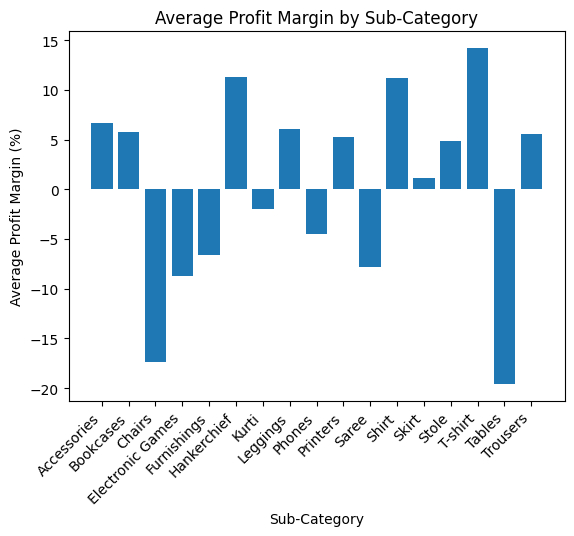

In [16]:
final_df['profit_margin'] = (final_df['Profit']/final_df['Amount'])*100
profitable_subcategories = final_df.groupby('Sub-Category').agg({
    'profit_margin': 'mean'
})

# plt.figure(figsize=(10,6))
plt.bar(profitable_subcategories.index, profitable_subcategories['profit_margin'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Sub-Category')
plt.ylabel('Average Profit Margin (%)')
plt.title('Average Profit Margin by Sub-Category')
plt.savefig('Average_Profit_Margin_by_subcategory.png', bbox_inches='tight')

Aggregate sales and profit by State.


In [17]:
Total_sales_Profit = final_df.groupby('State').agg({
    'Amount':'sum', 
    'Profit':'sum'
})

Total_sales_Profit.to_excel('Total_Amount_Profit_by_State.xlsx', index=True)
print(Total_sales_Profit)

                     Amount  Profit
State                              
Andhra Pradesh      13256.0  -496.0
Bihar               12943.0  -321.0
Delhi               22531.0  2987.0
Goa                  6705.0   370.0
Gujarat             21058.0   465.0
Haryana              8863.0  1325.0
Himachal Pradesh     8666.0   656.0
Jammu and Kashmir   10829.0     8.0
Karnataka           15058.0   645.0
Kerala              13459.0  1871.0
Madhya Pradesh     105140.0  5551.0
Maharashtra         95348.0  6176.0
Nagaland            11903.0   148.0
Punjab              16786.0  -609.0
Rajasthan           21149.0  1257.0
Sikkim               5276.0   401.0
Tamil Nadu           6087.0 -2216.0
Uttar Pradesh       22359.0  3237.0
West Bengal         14086.0  2500.0


Create a choropleth map (using plotly or folium) showing total sales by state.


In [18]:
import plotly.express as px
import nbformat as nbformat

# --- 1️⃣ Aggregate sales by state ---
state_sales = final_df.groupby('State', as_index=False)['Amount'].sum()

# --- 2️⃣ Create choropleth map ---
fig = px.choropleth(
    state_sales,
    geojson='https://raw.githubusercontent.com/geohacker/india/master/state/india_telengana.geojson',
    featureidkey='properties.NAME_1',
    locations='State',
    color='Amount',
    color_continuous_scale='Blues',
    title='Total Sales Amount by State (India)',
    hover_name='State'


)


# --- 3️⃣ Adjust map layout ---
fig.update_geos(fitbounds="locations", visible=False)
fig.write_image('Choropleth of Total Sales By State.png')
fig.show()

Add interactive filters for category/month (optional advanced feature).


In [19]:
# Assume final_df has columns: State, Amount, Category, Month-Year
final_df['Month-Year'] = pd.to_datetime(final_df['Order Date']).dt.strftime('%b-%y')

# Aggregate sales by State, Category, and Month
agg_df = final_df.groupby(['State', 'Category', 'Month-Year'], as_index=False)['Amount'].sum()

import plotly.express as px
import nbformat

fig = px.choropleth(
    agg_df,
    geojson='https://raw.githubusercontent.com/geohacker/india/master/state/india_telengana.geojson',
    featureidkey='properties.NAME_1',
    locations='State',
    color='Amount',
    color_continuous_scale='Blues',
    hover_name='State',
    hover_data={'Amount': True, 'Category': True},
    animation_frame='Month-Year',    # allows filtering by month
    facet_col='Category',            # shows separate maps for each category
    title='Total Sales by State, Category, and Month'
)

fig.update_geos(fitbounds="locations", visible=False)
# fig.write_image('Choropleth of Total Sales By State, Category, Month.png')
fig.show()


Find top 10 customers by total purchase value.


In [20]:
Top10_Purchased_customers = final_df.groupby('CustomerName')['Amount'].sum().sort_values(ascending=False)
Top10_Purchased_customers.to_excel('Top Customers by Total Purchasr Value.xlsx')
print(Top10_Purchased_customers.head(10))

CustomerName
Yaanvi      9177.0
Pooja       9030.0
Abhishek    8135.0
Surabhi     6889.0
Soumya      6869.0
Harshal     6026.0
Priyanka    5762.0
Shruti      5750.0
Abhijeet    5691.0
Sarita      5449.0
Name: Amount, dtype: float64


Calculate average order value (AOV).


In [21]:
avg_order_value = final_df['Amount'].mean()
print(avg_order_value)

287.668


Determine frequency of orders per customer.




In [22]:
frequency_order_cust = round(final_df.groupby('CustomerName')['Amount'].mean(),2)
print(frequency_order_cust)

CustomerName
Aakanksha      37.00
Aarushi       391.75
Aashna        275.86
Aastha        546.00
Aayush         92.67
              ...   
Wale           32.50
Yaanvi        705.92
Yash          158.20
Yogesh        338.81
Yohann       1314.00
Name: Amount, Length: 332, dtype: float64


Plot monthly trends for:   
Total Sales,  
Profit,  
Quantity sold,  
Use matplotlib or seaborn line plots.        


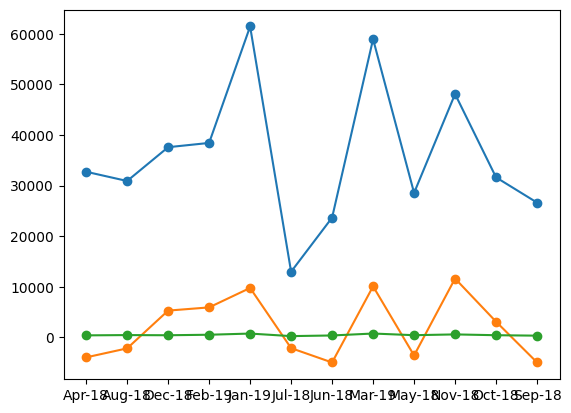

In [23]:
final_df['Month-Year'] = pd.to_datetime(final_df['Order Date']).dt.strftime('%b-%y')

Total_sales = final_df.groupby('Month-Year').agg({
    'Amount':'sum',
    'Profit':'sum',
    'Quantity':'sum'
})

plt.plot(Total_sales,  marker='o')
plt.savefig('Line Chart Of Total Sales, Profit, Quantity Sold, by Month ')

Add moving average (3-month rolling mean).


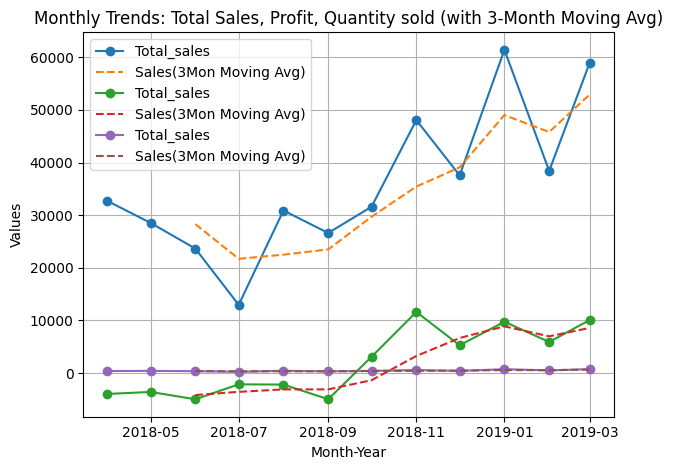

In [24]:
final_df['Month-Year'] = pd.to_datetime(final_df['Order Date']).dt.to_period('M')

Total_sales = final_df.groupby('Month-Year').agg({
    'Amount':'sum',
    'Profit':'sum',
    'Quantity':'sum'
})
Total_sales.index = Total_sales.index.to_timestamp()
moving_avg = Total_sales.rolling(window=3).mean()

plt.Figure(figsize=(10,6))
plt.plot(Total_sales.index, Total_sales['Amount'], label='Total_sales', marker='o')
plt.plot(moving_avg.index, moving_avg['Amount'], label='Sales(3Mon Moving Avg)', linestyle='--')

plt.plot(Total_sales.index, Total_sales['Profit'], label='Total_sales', marker='o')
plt.plot(moving_avg.index, moving_avg['Profit'], label='Sales(3Mon Moving Avg)', linestyle='--')

plt.plot(Total_sales.index, Total_sales['Quantity'], label='Total_sales', marker='o')
plt.plot(moving_avg.index, moving_avg['Quantity'], label='Sales(3Mon Moving Avg)', linestyle='--')

plt.title('Monthly Trends: Total Sales, Profit, Quantity sold (with 3-Month Moving Avg)')
plt.xlabel('Month-Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Line Chart Of Total Sales Profit Quantity by Month.png', dpi=300)
plt.show()



Compare monthly sales for each Category.


In [25]:
final_df['Month-Year'] = pd.to_datetime(final_df['Order Date']).dt.strftime('%b-%y')

Month_sales_category_wise = final_df.groupby(['Category', 'Month-Year']).agg({
    'Amount':'sum'
})

Month_sales_category_wise.to_excel('Month_sales_category_wise.xlsx', index=True)
print(Month_sales_category_wise.head(5))

                      Amount
Category Month-Year         
Clothing Apr-18      13478.0
         Aug-18      11822.0
         Dec-18       9545.0
         Feb-19       9569.0
         Jan-19      13466.0


Find which sub-category has consistent growth.


   Sub-Category      mean       std  consistency_score
14      T-shirt  1.037739  2.126843           0.487925
6         Kurti  4.269180  8.919981           0.478609
12        Skirt  0.522978  1.117644           0.467929
13        Stole  0.667117  1.590550           0.419426
9      Printers  0.622030  1.485959           0.418605


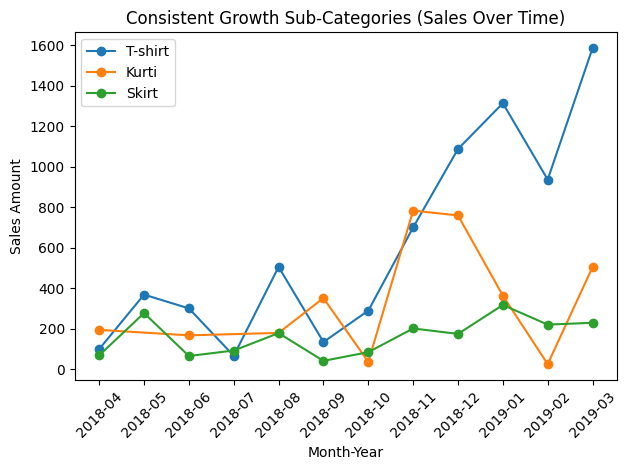

In [26]:
# Convert order date and extract month-year
final_df['Month-Year'] = pd.to_datetime(final_df['Order Date']).dt.to_period('M')

# Group by Sub-Category and Month-Year
subcat_monthly = final_df.groupby(['Sub-Category', 'Month-Year']).agg({
    'Amount': 'sum'
}).reset_index()

# Sort for correct chronological order
subcat_monthly = subcat_monthly.sort_values(['Sub-Category', 'Month-Year'])

# Compute month-over-month growth rate for each Sub-Category
subcat_monthly['Growth'] = subcat_monthly.groupby('Sub-Category')['Amount'].pct_change()

# Measure growth consistency using the standard deviation (lower = more consistent)
growth_consistency = (
    subcat_monthly.groupby('Sub-Category')['Growth']
    .agg(['mean', 'std'])
    .reset_index()
)

# Drop subcategories with too few data points
growth_consistency = growth_consistency.dropna()

# Calculate a "consistency score" (optional)
growth_consistency['consistency_score'] = growth_consistency['mean'] / growth_consistency['std']

# Sort: higher mean growth & lower std → more consistent
consistent_growth = growth_consistency.sort_values(
    by=['consistency_score'], ascending=False
)

# Display top 5 most consistent sub-categories
consistent_growth.to_excel('Consistent_growth.xlsx', index=True)
print(consistent_growth.head())

top_subcats = consistent_growth.head(3)['Sub-Category']

for sub in top_subcats:
    temp = subcat_monthly[subcat_monthly['Sub-Category'] == sub]
    plt.plot(temp['Month-Year'].astype(str), temp['Amount'], marker='o', label=sub)

plt.xticks(rotation=45)
plt.title('Consistent Growth Sub-Categories (Sales Over Time)')
plt.xlabel('Month-Year')
plt.ylabel('Sales Amount')
plt.legend()
plt.tight_layout()
plt.savefig('Consistant Growth Sub-Category.png', dpi=300)
plt.show()


Find which sub-category has consistent growth.                    
Highlight those that are declining.


📉 Sub-categories with consistent decline:
Empty DataFrame
Columns: [Sub-Category, mean, std, consistency_score]
Index: []


C:\Users\kasif\AppData\Local\Temp\ipykernel_9088\1687693616.py:52: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



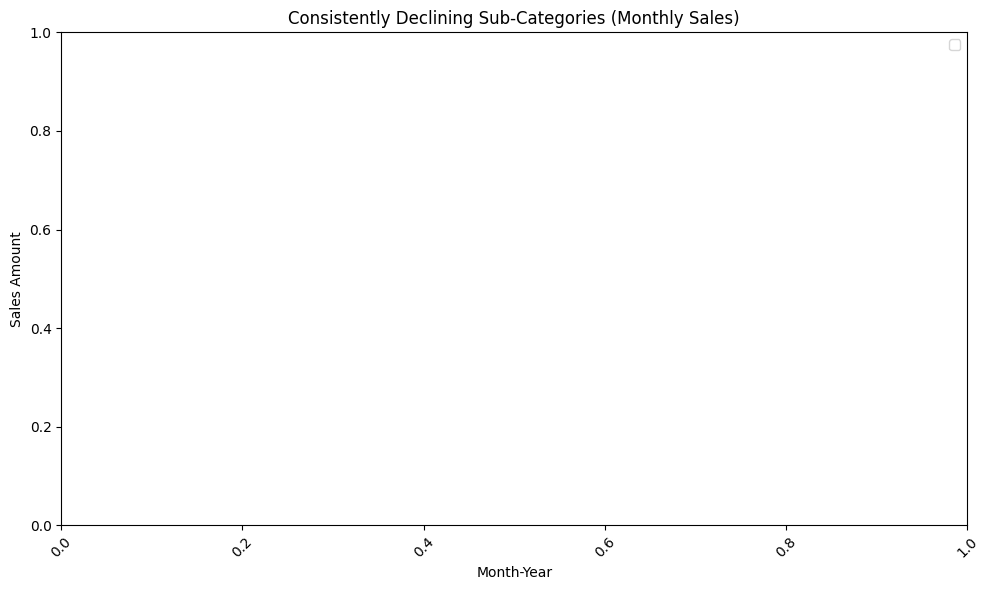

In [27]:
# Convert order date and extract month-year
final_df['Month-Year'] = pd.to_datetime(final_df['Order Date']).dt.to_period('M')

# Group by Sub-Category and Month-Year
subcat_monthly = final_df.groupby(['Sub-Category', 'Month-Year']).agg({
    'Amount': 'sum'
}).reset_index()

# Sort for correct chronological order
subcat_monthly = subcat_monthly.sort_values(['Sub-Category', 'Month-Year'])

# Compute month-over-month growth rate for each Sub-Category
subcat_monthly['Growth'] = subcat_monthly.groupby('Sub-Category')['Amount'].pct_change()

# Measure growth consistency using the standard deviation (lower = more consistent)
growth_consistency = (
    subcat_monthly.groupby('Sub-Category')['Growth']
    .agg(['mean', 'std'])
    .reset_index()
)

# Drop subcategories with too few data points
growth_consistency = growth_consistency.dropna()

# Calculate a "consistency score" (optional)
growth_consistency['consistency_score'] = growth_consistency['mean'] / growth_consistency['std']

# Sort: higher mean growth & lower std → more consistent
consistent_growth = growth_consistency.sort_values(
    by=['consistency_score'], ascending=False
)

# Filter: consistently declining = negative mean growth + low volatility
declining_subcats = growth_consistency[
    (growth_consistency['mean'] < 0) & (growth_consistency['std'] < growth_consistency['std'].median())
].sort_values(by='consistency_score', ascending=False)

print("📉 Sub-categories with consistent decline:")
print(declining_subcats)


top_decliners = declining_subcats.head(3)['Sub-Category']

plt.figure(figsize=(10,6))
for sub in top_decliners:
    temp = subcat_monthly[subcat_monthly['Sub-Category'] == sub]
    plt.plot(temp['Month-Year'].astype(str), temp['Amount'], marker='o', label=sub)

plt.title('Consistently Declining Sub-Categories (Monthly Sales)')
plt.xlabel('Month-Year')
plt.ylabel('Sales Amount')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
